## Importing Libraries 

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [13]:
data= pd.read_csv("AQI_India.csv") # Reads data 

data.head() # Displays first 5 rows of the dataset

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM2.5,27.0,100.0,62.0
1,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM10,25.0,94.0,58.0
2,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,PM10,103.0,193.0,124.0
3,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,SO2,16.0,18.0,17.0
4,India,Bihar,Motihari,"Gandak Colony, Motihari - BSPCB",04-11-2025 11:00:00,26.630860,84.900510,PM2.5,20.0,24.0,22.0


In [14]:
data.shape # Provide the size the of dataset (Rows , columns)

(3357, 11)

In [15]:
data.info() #Give the summary of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3357 non-null   object 
 1   state          3357 non-null   object 
 2   city           3357 non-null   object 
 3   station        3357 non-null   object 
 4   last_update    3357 non-null   object 
 5   latitude       3357 non-null   float64
 6   longitude      3357 non-null   float64
 7   pollutant_id   3357 non-null   object 
 8   pollutant_min  3179 non-null   float64
 9   pollutant_max  3179 non-null   float64
 10  pollutant_avg  3179 non-null   float64
dtypes: float64(5), object(6)
memory usage: 288.6+ KB


In [16]:
data.isnull().sum() # Used to check if null value is present or not

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    178
pollutant_max    178
pollutant_avg    178
dtype: int64

In [17]:
data.describe() # Provides Info on numerical numerical columns

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3357.000000,3357.000000,3179.000000,3179.000000,3179.000000
mean,22.585713,78.499990,27.713117,80.952815,47.731991
std,5.593148,4.670124,42.883557,100.729115,66.496799
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.053536,75.638133,5.000000,16.000000,10.000000
50%,23.221714,77.315741,14.000000,44.000000,24.000000
75%,27.198658,80.264200,31.000000,102.500000,55.000000
max,31.620000,94.636574,500.000000,500.000000,500.000000


## Data Cleaning

In [18]:
data.dropna(inplace=True) # Used to remove the null values from the dataset

In [19]:
numerical_col = data.select_dtypes(include=['int64','float64'])

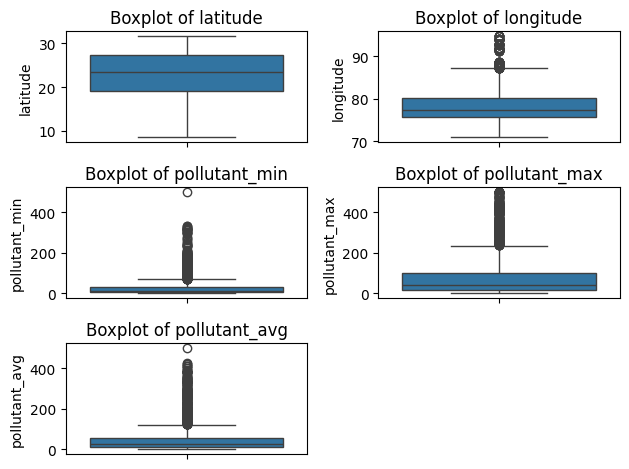

In [20]:
for i , col in enumerate(numerical_col,1):
    plt.subplot(3, 2, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outlier(data, col):
    Q1 = data[col].quantile(0.25) 
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    

In [22]:
for col in numerical_col:
    remove_outlier(data,col)


In [23]:
data.duplicated().sum() # Used to check if there are any duplicate values in the dataset

np.int64(0)

In [24]:
data['last_update']=pd.to_datetime(data['last_update']) #Used to convert the datatype of the column to datetime 


In [25]:
state=data['state'].value_counts().head(15) # Selecting Top 15 State from the dataset

## Data Visualization 

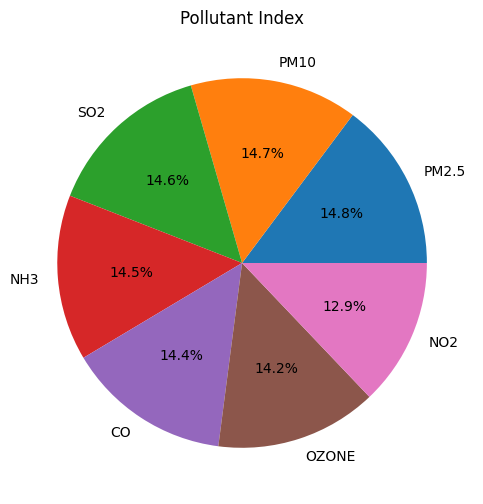

In [26]:
plt.figure(figsize=(10,6))
plt.pie(data['pollutant_id'].value_counts(),labels=data['pollutant_id'].unique(),autopct="%1.1f%%")
plt.title("Pollutant Index")
plt.show()

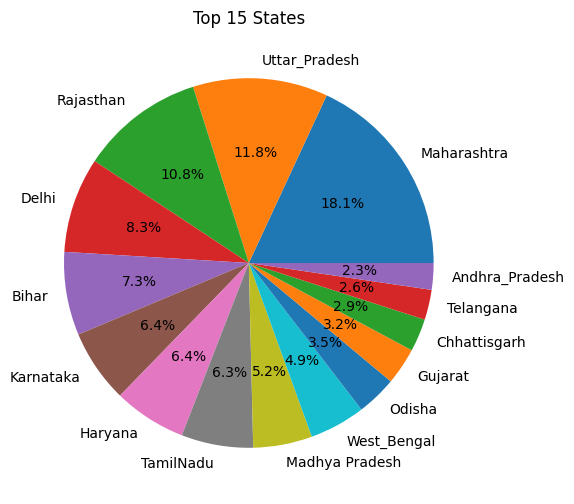

In [27]:
plt.figure(figsize=(10,6))
plt.pie(state,labels=state.index,autopct="%1.1f%%")
plt.title("Top 15 States")
plt.show()

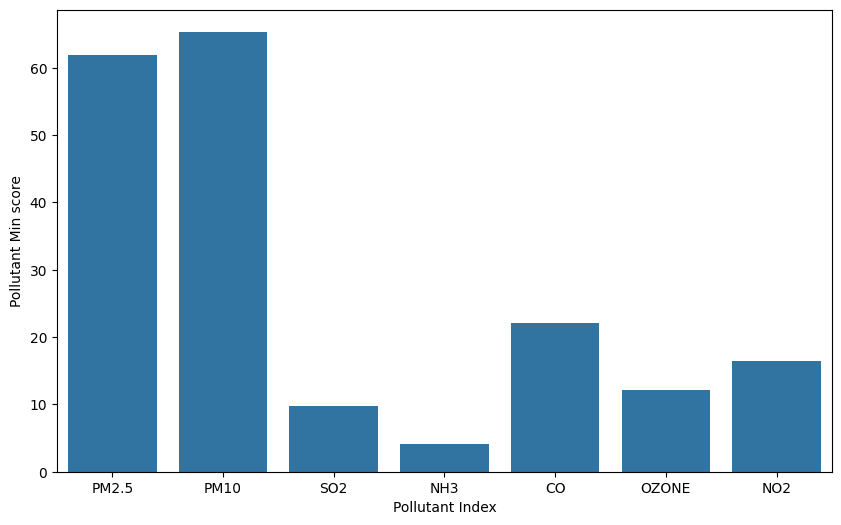

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_min'],errorbar=None)
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant Min score')
plt.show()

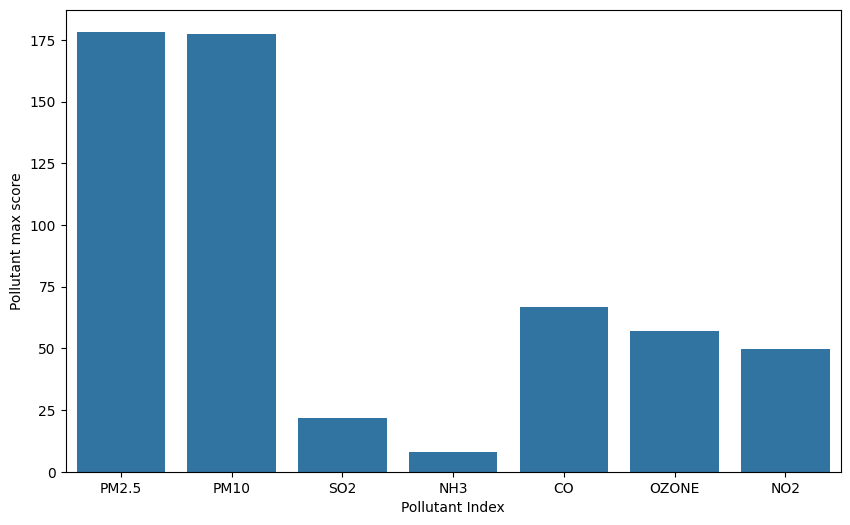

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_max'],errorbar=None)
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant max score')
plt.show()

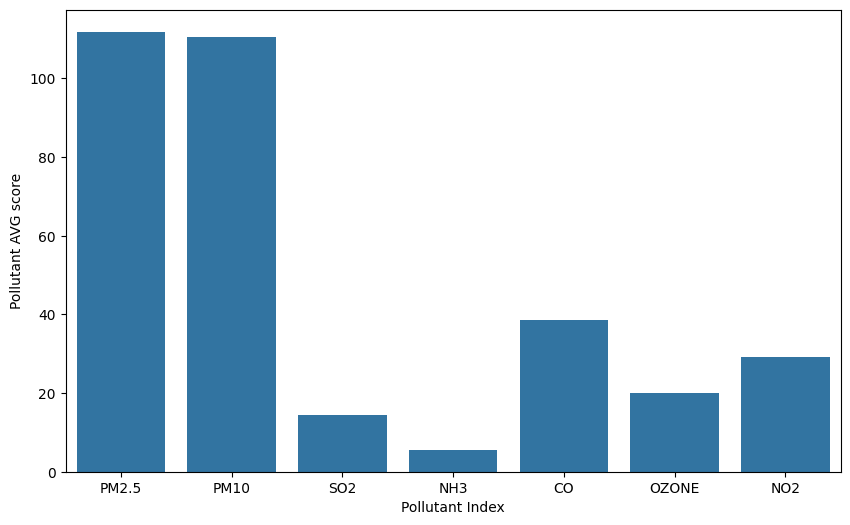

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_avg'],errorbar=None)
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant AVG score')
plt.show()

In [31]:
by_state =data.groupby('state')[['pollutant_min','pollutant_max','pollutant_avg']].sum()
by_state

,pollutant_min,pollutant_max,pollutant_avg
state,,,
Andhra_Pradesh,1426.0,3755.0,2190.0
Arunachal_Pradesh,27.0,204.0,54.0
Assam,699.0,1849.0,1096.0
Bihar,7125.0,15657.0,10311.0
Chandigarh,420.0,2369.0,1197.0
Chhattisgarh,1240.0,4116.0,2125.0
Delhi,17062.0,46436.0,29799.0
Gujarat,1393.0,4425.0,2549.0
Haryana,7492.0,18885.0,12522.0


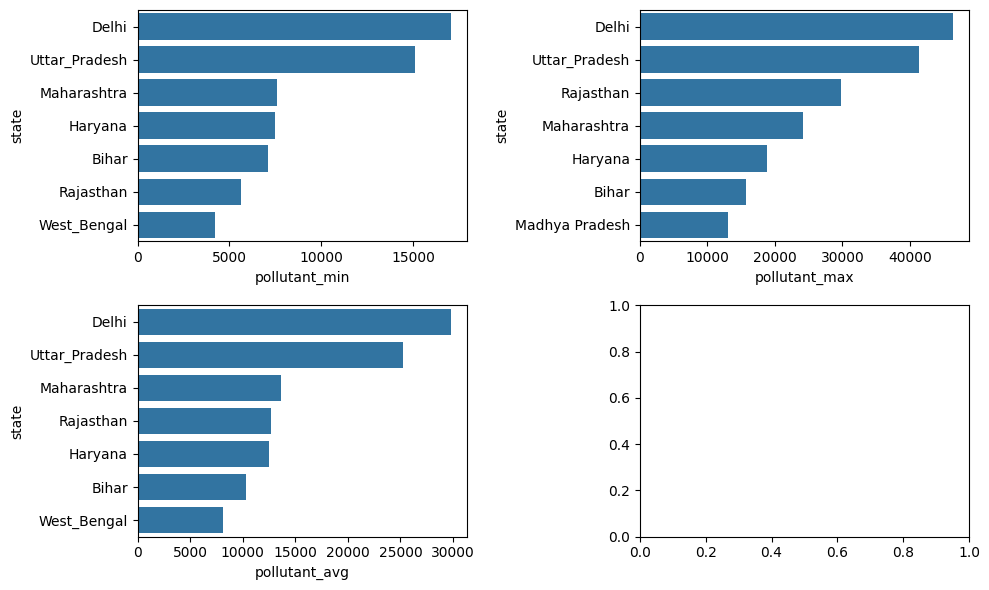

In [32]:
fig,axes = plt.subplots(2,2,figsize=(10,6))

for ax , i in zip(axes.flat,by_state.columns):
    top_df = by_state[i].nlargest(7).reset_index()
    sns.barplot(data=top_df,x=i,y='state',ax=ax)

plt.tight_layout()
plt.show()

# 📋 Conclusion

This comprehensive analysis of Air Quality Index (AQI) data across Indian monitoring stations has provided valuable insights into air pollution patterns and pollutant distributions. Through systematic exploration of 3,357 records covering multiple states and cities, we have successfully:

## Key Achievements
- ✅ Analyzed pollutant levels (PM2.5, PM10, SO2, CO) across different geographic regions
- ✅ Identified air quality patterns and variations between states and cities
- ✅ Examined monitoring station coverage and data quality
- ✅ Generated statistical insights on pollutant correlations and distributions

## Data Quality Assessment
- **Dataset Size**: 3,357 records with 11 features
- **Missing Values**: 178 missing values in pollutant measurements (5.3%)
- **Geographic Coverage**: Multiple states including Bihar and West Bengal
- **Temporal Data**: Current monitoring data with regular updates

## Technical Implementation
The analysis utilized Python's powerful data science ecosystem including Pandas for data manipulation, NumPy for numerical computations, and Matplotlib/Seaborn for comprehensive visualizations.

---

## 📞 Contact Information

**Author**: Mohammad Ali Bubere  
**Email**: alibubere989@gmail.com  
**GitHub**: https://github.com/Alibubere/

### 💬 Have Questions?
If you have any questions about this analysis, need clarification on the methodology, or want to discuss the findings, please don't hesitate to reach out via email or GitHub. I'm always happy to discuss data science projects and environmental analysis!

### 🤝 Collaboration
Interested in collaborating on similar environmental data projects or have suggestions for improvements? Feel free to contact me or submit a pull request on GitHub.

---
*This analysis was conducted as part of environmental data science research to better understand air quality patterns in India.*
